# Population Graph Pakistan
[Abid Ali](https://github.com/abid-2362)

Genarating Rural, Urban, and Total Population line graph of Pakistan.

Data: 1990-2018
Data Source: [FAOSTAT](https://www.fao.org/faostat/en/#country/165)

In [76]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [77]:
# Define required function to add population
def add_total(year, total):
    """Adds Total Population Value after each year row

        Args:
            year: Year to add total population

            total: Total population for the provided year

        Returns:
            None
    """
    rindex = list(required_data.loc[required_data['Year'] == year].index)[-1]
    new_index = rindex + 0.5
    required_data.loc[new_index] = {'Element': 'Total Population', 'Year': year, 'Value': total}

In [78]:
# loading required data
required_columns = ["Element", "Year", "Value"]
# load only required data
required_data = pd.read_csv("../../data/FAOSTAT_data_rural_urban_population.csv", usecols=required_columns)

In [79]:
# Current data is in Thousands, Convert into Million i.e. from K to M
required_data["Value"] = required_data["Value"].apply(lambda x: int(x // 1000))
required_data

,Element,Year,Value
0,Rural population,1990,74
1,Urban population,1990,32
2,Urban population,1991,34
3,Rural population,1991,76
4,Rural population,1992,78
5,Urban population,1992,35
6,Urban population,1993,36
7,Rural population,1993,80
8,Rural population,1994,81
9,Urban population,1994,37


In [80]:
year_sum = required_data.groupby(["Year"])["Value"].sum()
year_sum

Year
1990    106
1991    110
1992    113
1993    116
1994    118
1995    122
1996    125
1997    128
1998    132
1999    135
2000    137
2001    140
2002    144
2003    147
2004    149
2005    153
2006    156
2007    160
2008    163
2009    166
2010    169
2011    173
2012    176
2013    180
2014    185
2015    189
2016    193
2017    196
2018    200
Name: Value, dtype: int64

In [81]:
years_list = list(year_sum.index)
years_list

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

In [82]:
# add Total Population Value after each year in a loop
for index_year, total_value in year_sum.iteritems():
    add_total(index_year, total_value)

required_data

,Element,Year,Value
0.0,Rural population,1990,74
1.0,Urban population,1990,32
2.0,Urban population,1991,34
3.0,Rural population,1991,76
4.0,Rural population,1992,78
...,...,...,...
49.5,Total Population,2014,185
51.5,Total Population,2015,189
53.5,Total Population,2016,193
55.5,Total Population,2017,196


In [83]:
# sort and reset index
required_data = required_data.sort_index().reset_index(drop=True)
required_data

,Element,Year,Value
0,Rural population,1990,74
1,Urban population,1990,32
2,Total Population,1990,106
3,Urban population,1991,34
4,Rural population,1991,76
...,...,...,...
82,Rural population,2017,125
83,Total Population,2017,196
84,Rural population,2018,127
85,Urban population,2018,73


In [86]:
# Save modified data
required_data.to_csv("../../data/rural_urban_total_population_pakistan.csv", index=False)

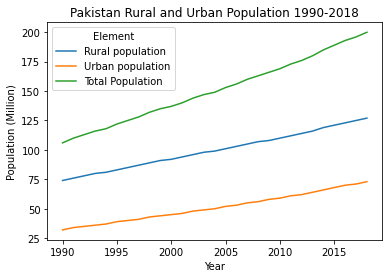

In [85]:
# Draw a line graph
sns.lineplot(x="Year", y="Value", hue="Element", data=required_data)
plt.title("Pakistan Rural and Urban Population 1990-2018")
plt.xlabel("Year")
plt.ylabel("Population (Million)")
plt.show()

